In [30]:
import os
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('mode.chained_assignment', None)
import numpy as np
import random
import datetime

In [31]:
hpg_reserve = pd.read_csv(os.path.join(os.getcwd(), 'Data', 'hpg_reserve.csv.gz'))
air_reserve = pd.read_csv(os.path.join(os.getcwd(), 'Data', 'air_reserve.csv'))
store_id_relation = pd.read_csv(os.path.join(os.getcwd(), 'Data', 'store_id_relation.csv'))
air_store_info = pd.read_csv(os.path.join(os.getcwd(), 'Data', 'air_store_info.csv'))
air_visit_data = pd.read_csv(os.path.join(os.getcwd(), 'Data', 'air_visit_data.csv'))

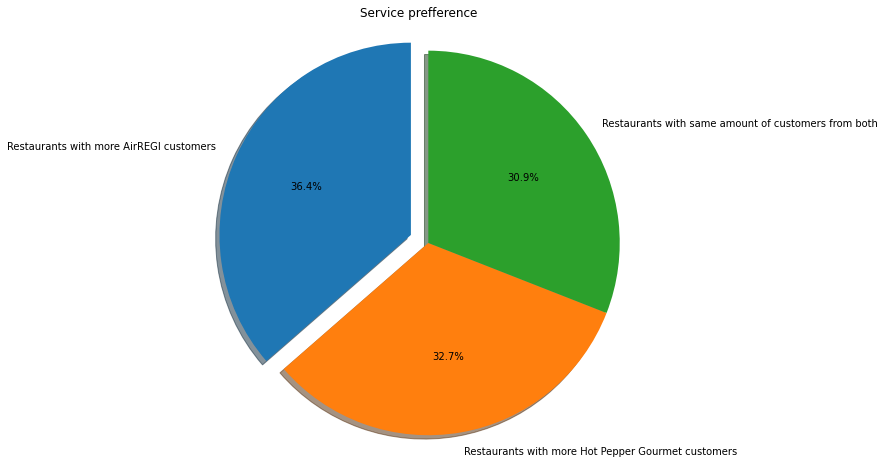

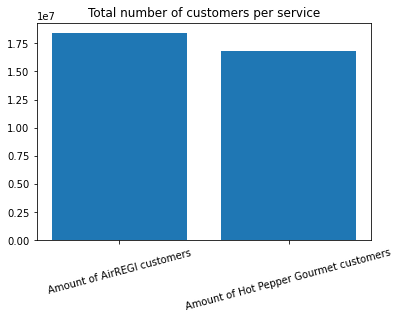

In [32]:
air_store_matches = (pd.merge(air_reserve, store_id_relation, on='air_store_id', how='inner'))
air_store_matches_2016 = air_store_matches[air_store_matches['visit_datetime'].str.contains('2016')]
air_and_hpg_matches = (pd.merge(air_store_matches_2016, hpg_reserve, on='hpg_store_id', how='inner'))
air_and_hpg_matches_final = air_and_hpg_matches[['reserve_visitors_x','reserve_visitors_y']]
air_more_than_hpg = air_and_hpg_matches[air_and_hpg_matches['reserve_visitors_x']>air_and_hpg_matches['reserve_visitors_y']]
hpg_more_than_air = air_and_hpg_matches[air_and_hpg_matches['reserve_visitors_y']>air_and_hpg_matches['reserve_visitors_x']]
same_air_than_hpg = air_and_hpg_matches[air_and_hpg_matches['reserve_visitors_x'] == air_and_hpg_matches['reserve_visitors_y']]

labels = 'Restaurants with more AirREGI customers ', 'Restaurants with more Hot Pepper Gourmet customers', 'Restaurants with same amount of customers from both'
sizes = [len(air_more_than_hpg), len(hpg_more_than_air), len(same_air_than_hpg)]
explode = (0.1,0, 0)
fig1, ax1 = plt.subplots(figsize = (8,8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Service prefference')
plt.show()

x = np.arange(2)
plt.bar(x, height=[sum(air_and_hpg_matches['reserve_visitors_x']),sum(air_and_hpg_matches['reserve_visitors_y'])])
plt.xticks(x, ['Amount of AirREGI customers','Amount of Hot Pepper Gourmet customers'], rotation=15)
plt.title('Total number of customers per service')
plt.show()

#### I've decided to plot a pie chart to show the proportion of restaurants wich depend more on one service or another, and a histogram to show the total number of customers
#### We can see that AirRegi generates slightly more customers, but the amount of restaurants that depend in AirREGI and the amount of restaurants that depend on Hot Pepper Gourmet is quite balanced

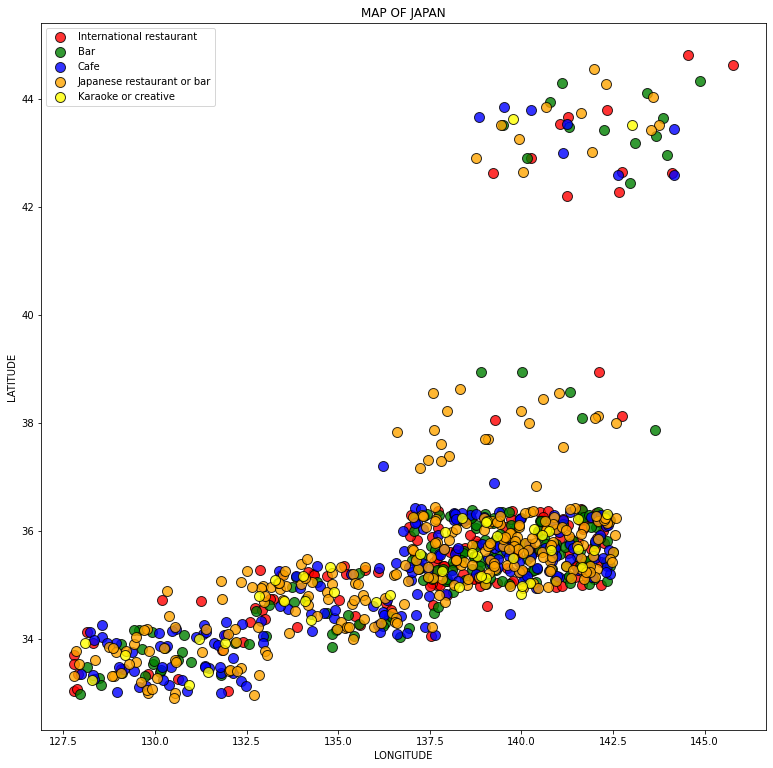

In [33]:
def randomNoise(x):
    return(x*(1/100)*random.uniform(98,102))


air_store_international = air_store_info[(air_store_info['air_genre_name'].str.contains('Italian') |
                                   air_store_info['air_genre_name'].str.contains('Western') |
                                   air_store_info['air_genre_name'].str.contains('International') |
                                   air_store_info['air_genre_name'].str.contains('Korean'))]

air_store_international['longitude'] = air_store_international['longitude'].apply(randomNoise)
air_store_international['latitude'] = air_store_international['latitude'].apply(randomNoise)

air_store_bar = air_store_info[(air_store_info['air_genre_name'].str.contains('bar') |
                                   air_store_info['air_genre_name'].str.contains('Bar'))]

air_store_bar['longitude'] = air_store_bar['longitude'].apply(randomNoise)
air_store_bar['latitude'] = air_store_bar['latitude'].apply(randomNoise)

air_store_cafe = air_store_info[air_store_info['air_genre_name'].str.contains('Cafe')]

air_store_cafe['longitude'] = air_store_cafe['longitude'].apply(randomNoise)
air_store_cafe['latitude'] = air_store_cafe['latitude'].apply(randomNoise)

air_store_japanese = air_store_info[(air_store_info['air_genre_name'].str.contains('Japanese') | 
                                   air_store_info['air_genre_name'].str.contains('Izakaya') |
                                   air_store_info['air_genre_name'].str.contains('Okonomiyaki'))]

air_store_japanese['longitude'] = air_store_japanese['longitude'].apply(randomNoise)
air_store_japanese['latitude'] = air_store_japanese['latitude'].apply(randomNoise)

air_store_karaoke = air_store_info[(air_store_info['air_genre_name'].str.contains('Other') |
                                   air_store_info['air_genre_name'].str.contains('Karaoke') |
                                   air_store_info['air_genre_name'].str.contains('Asian') |
                                   air_store_info['air_genre_name'].str.contains('Creative'))]

air_store_karaoke['longitude'] = air_store_karaoke['longitude'].apply(randomNoise)
air_store_karaoke['latitude'] = air_store_karaoke['latitude'].apply(randomNoise)


data = ((air_store_international['longitude'], air_store_international['latitude']),
        (air_store_bar['longitude'], air_store_bar['latitude']),
        (air_store_cafe['longitude'], air_store_cafe['latitude']),
        (air_store_japanese['longitude'], air_store_japanese['latitude']),
        (air_store_karaoke['longitude'], air_store_karaoke['latitude']))
colors = ("red", "green", "blue", "orange", "yellow")
groups = ("International restaurant", "Bar", "Cafe","Japanese restaurant or bar", "Karaoke or creative")

# Create plot
fig = plt.figure(figsize = (13,13))
ax = fig.add_subplot(1, 1, 1)

for data, color, group in zip(data, colors, groups):
    x, y = data
    ax.scatter(x, y, alpha=0.8, c=color, edgecolors='k', s=100, label=group)

plt.title('MAP OF JAPAN')
plt.xlabel('LONGITUDE')
plt.ylabel('LATITUDE')
plt.legend(loc=2)
plt.show()

#### I've decided to show the data as a map, where different colours indicate different types of restaurants.
#### The map shows that restaurants are quite concentrated in the cities, there is clearly an abundance of Cafes and Japanese restaurants.  But overall different types of restaurants are pretty well mixed. We can clearly see tokyo on the map.

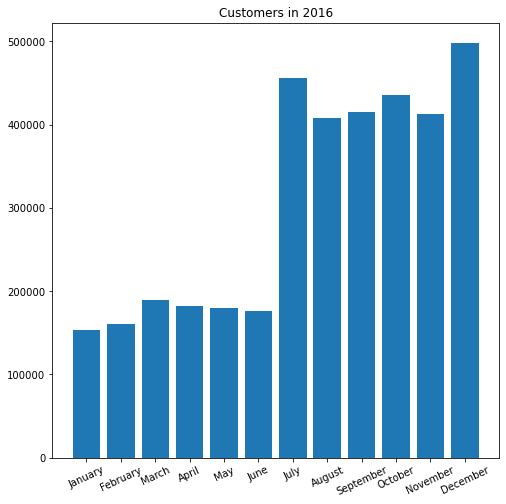

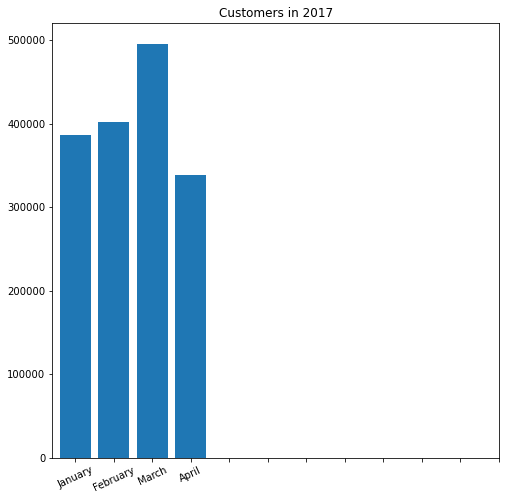

In [34]:
x = np.arange(12)

fig1, ax1 = plt.subplots(figsize = (8,8))
ax1.bar(x, height=[sum(air_visit_data[air_visit_data['visit_date'].str.contains('2016-01')].visitors),
                   sum(air_visit_data[air_visit_data['visit_date'].str.contains('2016-02')].visitors),
                   sum(air_visit_data[air_visit_data['visit_date'].str.contains('2016-03')].visitors),
                   sum(air_visit_data[air_visit_data['visit_date'].str.contains('2016-04')].visitors),
                   sum(air_visit_data[air_visit_data['visit_date'].str.contains('2016-05')].visitors),
                   sum(air_visit_data[air_visit_data['visit_date'].str.contains('2016-06')].visitors),
                   sum(air_visit_data[air_visit_data['visit_date'].str.contains('2016-07')].visitors),
                   sum(air_visit_data[air_visit_data['visit_date'].str.contains('2016-08')].visitors),
                   sum(air_visit_data[air_visit_data['visit_date'].str.contains('2016-09')].visitors),
                   sum(air_visit_data[air_visit_data['visit_date'].str.contains('2016-10')].visitors),
                   sum(air_visit_data[air_visit_data['visit_date'].str.contains('2016-11')].visitors),
                   sum(air_visit_data[air_visit_data['visit_date'].str.contains('2016-12')].visitors)])



plt.xticks(x, ['January','February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], rotation=25)
plt.title('Customers in 2016')
plt.show()

y = np.arange(4)

fig1, ax2 = plt.subplots(figsize = (8,8))
ax2.bar(y, height=[sum(air_visit_data[air_visit_data['visit_date'].str.contains('2017-01')].visitors),
                   sum(air_visit_data[air_visit_data['visit_date'].str.contains('2017-02')].visitors),
                   sum(air_visit_data[air_visit_data['visit_date'].str.contains('2017-03')].visitors),
                   sum(air_visit_data[air_visit_data['visit_date'].str.contains('2017-04')].visitors)])



plt.xticks(x, ['January','February', 'March', 'April'], rotation=25)
plt.title('Customers in 2017')
plt.show()

#### I've decided to show the trend of customers with respect to the month of the year using two histograms, one for each year
#### On the graph representing the year 2016 is clearly visible that restaurants recive more customers in the last 6 months of the year. For 2017 the trend isn't visible due to the lack of data

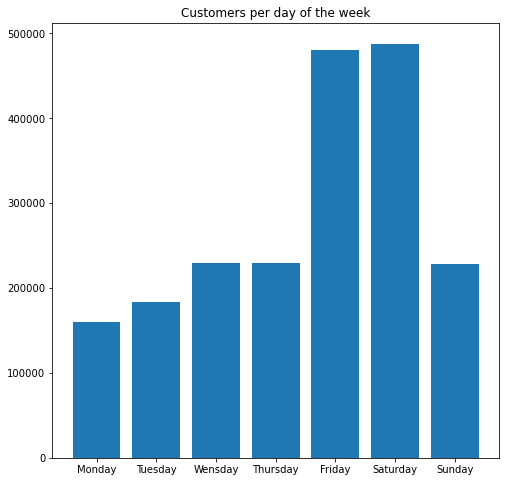

In [35]:
hpg_reserve_1 = hpg_reserve

def toWeekday(x):
    year = int(x[0:4])
    month = int(x[5:7])
    day = int(x[8:10])
    return datetime.date(year,month,day).weekday()

hpg_reserve_1['visit_datetime'] = hpg_reserve_1['visit_datetime'].apply(toWeekday)

x = np.arange(7)

fig1, ax1 = plt.subplots(figsize = (8,8))

ax1.bar(x, height = [sum(hpg_reserve_1['visit_datetime']==0),
                     sum(hpg_reserve_1['visit_datetime']==1),
                     sum(hpg_reserve_1['visit_datetime']==2),
                     sum(hpg_reserve_1['visit_datetime']==3),
                     sum(hpg_reserve_1['visit_datetime']==4),
                     sum(hpg_reserve_1['visit_datetime']==5),
                     sum(hpg_reserve_1['visit_datetime']==6)])


plt.xticks(x, ['Monday' , 'Tuesday', 'Wensday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Customers per day of the week')
plt.show()

#### I've showed the total number of customers per day of the week as a histogram.
#### It is clearly visible that people go to restaurants the most on Friday and Saturday

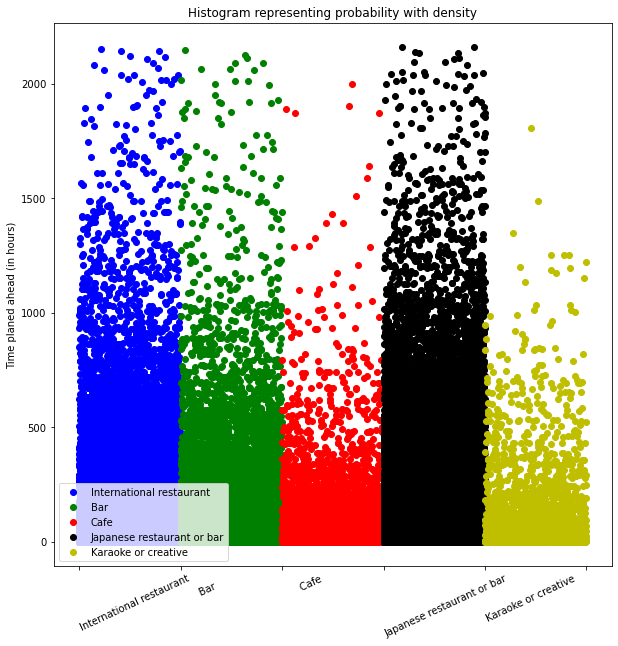

In [36]:
air_reserve_1 = air_reserve

def toDay(x):
    year = int(x[0:4])
    month = int(x[5:7])
    day = int(x[8:10])
    return datetime.date(year,month,day)

def timeDifference(x, y):
    difference = (toDay(x)-toDay(y)).days
    hour = int(x[11:13])
    hour1 = int(y[11:13])
    return(difference*24 +(hour-hour1))

def randomNumber(x):
    return(x + random.uniform(0, 1))

air_reserve_1['difference_time_hours'] = air_reserve_1.apply(lambda x: timeDifference(x['visit_datetime'], x['reserve_datetime']), axis=1)
air_reserve_1 = air_reserve_1[air_reserve_1['difference_time_hours'] < 2160]

merged_air_international = (pd.merge(air_reserve_1 ,air_store_international , on='air_store_id', how='inner'))
merged_air_international['axis_x'] = 0
merged_air_international['axis_x'] = merged_air_international['axis_x'].apply(randomNumber)

merged_air_bar = (pd.merge(air_reserve_1 ,air_store_bar , on='air_store_id', how='inner'))
merged_air_bar['axis_x'] = 1
merged_air_bar['axis_x'] = merged_air_bar['axis_x'].apply(randomNumber)

merged_air_cafe = (pd.merge(air_reserve_1 ,air_store_cafe , on='air_store_id', how='inner'))
merged_air_cafe['axis_x'] = 2
merged_air_cafe['axis_x'] = merged_air_cafe['axis_x'].apply(randomNumber)

merged_air_japanese = (pd.merge(air_reserve_1 ,air_store_japanese , on='air_store_id', how='inner'))
merged_air_japanese['axis_x'] = 3
merged_air_japanese['axis_x'] = merged_air_japanese['axis_x'].apply(randomNumber)

merged_air_karaoke = (pd.merge(air_reserve_1 ,air_store_karaoke , on='air_store_id', how='inner'))
merged_air_karaoke['axis_x'] = 4
merged_air_karaoke['axis_x'] = merged_air_karaoke['axis_x'].apply(randomNumber)

fig, ax = plt.subplots(figsize = (10, 10))

ax.plot(merged_air_international['axis_x'], merged_air_international['difference_time_hours'], 'bo',
         merged_air_bar['axis_x'], merged_air_bar['difference_time_hours'], 'go',
         merged_air_cafe['axis_x'], merged_air_cafe['difference_time_hours'], 'ro',
         merged_air_japanese['axis_x'], merged_air_japanese['difference_time_hours'], 'ko',
         merged_air_karaoke['axis_x'], merged_air_karaoke['difference_time_hours'], 'yo')

plt.legend(["International restaurant", "Bar", "Cafe","Japanese restaurant or bar", "Karaoke or creative"],loc = 3)
plt.xticks([0, 1, 2, 3, 4, 5] , ['International restaurant','      Bar      ', '      Cafe', 'Japanese restaurant or bar', 'Karaoke or creative' ], rotation=25, ha='left')
plt.ylabel('Time planed ahead (in hours)')
plt.title('Histogram representing probability with density')
plt.show()

#### I've decided to represent the data as a histogram of the 5 different tipes of restaurants against the time ahead with wich the reservation was planned. The density of the bar at different times shows the frequencie of that being the time with wich the reservation is made in advance
#### From the graph we can see that International restaurants and Japanese restaurants are booked with more advance, so we can interpret that those are the most popular types of restaurants for japanese people.